In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt


In [6]:
import datetime
import dateutil

In [ ]:
# https://www.bbc.co.uk/sounds/play/m000kdr6
# Actuary discusses the issue of excess deaths and if they were brought forward.


In [2]:
owid_covid_df = pd.read_csv('/Users/nishant.deshpande/personal/data/owid-covid-data.csv')

In [5]:
owid_covid_df.date.describe()

count          36774
unique           228
top       2020-08-07
freq             211
Name: date, dtype: object

In [7]:
owid_covid_df['dt'] = owid_covid_df.date.apply(lambda x: dateutil.parser.parse(x))

In [8]:
owid_covid_df.dt.describe()

count                   36774
unique                    228
top       2020-08-01 00:00:00
freq                      211
first     2019-12-31 00:00:00
last      2020-08-14 00:00:00
Name: dt, dtype: object

In [29]:
col_types = {'Year':'int32', 'Deaths':'int32', 'Population':'int32', 'Crude Rate':'float64',
             '% of Total Deaths':'float64',
            #'Crude Rate Lower 95% Confidence Interval':'float64', 
            #'Crude Rate Upper 95% Confidence Interval':'float64', 
            # 'Crude Rate Standard Error':'float64',
           }
na_values = ['Not Applicable']

In [30]:
df_mortality_cdc = pd.read_csv('/Users/nishant.deshpande/personal/data/mortality_data_cdc_clean.tsv', 
                               sep='\t', 
                               #dtype=col_types, 
                               na_values=na_values)

In [31]:
df_mortality_cdc.columns

Index(['Notes', 'State', 'State Code', 'Year', 'Year Code', 'Age Group',
       'Age Group Code', 'Deaths', 'Population', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error',
       '% of Total Deaths'],
      dtype='object')

In [32]:
df_mortality_cdc.describe()

,Notes,State Code,Year,Year Code,Deaths,Population,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
count,0.0,11703.000000,11703.000000,11703.000000,11703.000000,1.160000e+04,11600.000000,11600.000000,11600.000000
mean,NaN,28.822524,2007.463813,2007.463813,3837.618901,4.671407e+05,1869.280112,1988.496987,30.313035
std,NaN,15.622771,5.194149,5.194149,8081.106980,6.395947e+05,3901.263638,4083.808099,57.492407
min,NaN,1.000000,1999.000000,1999.000000,10.000000,2.461000e+03,3.220000,7.640000,0.580000
25%,NaN,16.000000,2003.000000,2003.000000,110.000000,9.656350e+04,49.240000,71.375000,3.887500
50%,NaN,29.000000,2007.000000,2007.000000,634.000000,2.575755e+05,198.205000,231.205000,8.790000
75%,NaN,42.000000,2012.000000,2012.000000,3630.000000,5.700590e+05,1085.387500,1168.102500,29.200000
max,NaN,56.000000,2016.000000,2016.000000,88331.000000,5.917785e+06,17398.580000,18082.770000,753.650000


In [33]:
df_mortality_cdc.head()

,Notes,State,State Code,Year,Year Code,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,% of Total Deaths
0,NaN,Alabama,1,1999,1999,< 1 year,1,606,58787.0,1030.84,948.77,1112.92,41.88,0.00%
1,NaN,Alabama,1,1999,1999,1-4 years,1-4,121,236153.0,51.24,42.11,60.37,4.66,0.00%
2,NaN,Alabama,1,1999,1999,5-9 years,5-9,86,315749.0,27.24,21.79,33.64,2.94,0.00%
3,NaN,Alabama,1,1999,1999,10-14 years,10-14,98,317379.0,30.88,25.07,37.63,3.12,0.00%
4,NaN,Alabama,1,1999,1999,15-19 years,15-19,338,327789.0,103.12,92.12,114.11,5.61,0.00%


In [34]:
df_deaths1 = pd.read_csv(
    '/Users/nishant.deshpande/personal/data/Cumulative_Provisional_Death_Counts_by_Sex__Race__and_Age_through_7_4_2020.csv')

In [35]:
df_deaths1.head(4)

,Data as of,Sex,Race/Ethnicity,Age group,Year,MMWRWeek,Analysis Period Start Date,Analysis Period End Date,AllCause,NaturalCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,08/04/2020,Female (F),Hispanic,0-4 years,2020,27,01/01/2020,07/04/2020,1104,1035,...,0,9,0,8,2,125,17,5,6,3
1,08/04/2020,Female (F),Hispanic,5-14 years,2020,27,01/01/2020,07/04/2020,272,167,...,0,9,2,7,0,18,9,6,1,1
2,08/04/2020,Female (F),Hispanic,15-24 years,2020,27,01/01/2020,07/04/2020,826,356,...,0,13,9,5,0,82,28,16,27,24
3,08/04/2020,Female (F),Hispanic,25-34 years,2020,27,01/01/2020,07/04/2020,1425,891,...,0,29,14,12,13,178,64,27,99,92


In [36]:
df_deaths1.describe()

,Year,MMWRWeek,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2020.0,27.0,13675.200000,12670.716667,170.200000,2513.875000,413.500000,554.683333,275.333333,683.941667,200.883333,224.658333,321.966667,2900.225000,663.675000,1072.341667,992.158333
std,0.0,0.0,36621.089692,35427.276849,437.365463,6909.986299,927.843519,2675.073809,762.519468,2265.456339,595.634979,600.750994,596.483349,8904.190825,2161.595323,2517.298951,2297.139430
min,2020.0,27.0,13.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,27.0,474.000000,294.250000,4.000000,33.750000,4.000000,0.000000,8.750000,2.750000,3.750000,2.000000,26.250000,22.250000,6.000000,10.500000,9.750000
50%,2020.0,27.0,1474.000000,1266.000000,15.000000,180.000000,44.000000,0.000000,29.000000,26.000000,14.500000,16.000000,71.000000,167.500000,42.000000,101.500000,96.500000
75%,2020.0,27.0,9089.500000,6942.250000,92.000000,1248.750000,320.000000,43.500000,191.250000,139.000000,93.250000,138.750000,298.750000,1316.500000,325.000000,886.250000,835.250000
max,2020.0,27.0,250099.000000,243553.000000,2350.000000,37523.000000,5169.000000,25569.000000,5139.000000,12308.000000,3299.000000,3576.000000,3837.000000,64432.000000,18235.000000,18486.000000,16589.000000


In [37]:
df_deaths1.columns

Index(['Data as of', 'Sex', 'Race/Ethnicity', 'Age group', 'Year', 'MMWRWeek',
       'Analysis Period Start Date', 'Analysis Period End Date', 'AllCause',
       'NaturalCause', 'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [38]:
non_natural_causes_cols = ['Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)']

In [50]:
df_deaths1['non_natural_causes_total'] = df_deaths1[non_natural_causes_cols].sum(axis=1)

In [51]:
df_deaths1['all_deaths1'] = df_deaths1.non_natural_causes_total + df_deaths1.NaturalCause

In [52]:
x1 = df_deaths1.AllCause - df_deaths1.all_deaths1

In [56]:
x1/df_deaths1.AllCause

0     -0.125906
1     -0.029412
2      0.238499
3     -0.149474
4     -0.526858
         ...   
115   -0.534483
116   -0.756254
117   -0.926643
118   -0.980959
119   -0.948124
Length: 120, dtype: float64

In [57]:
df_deaths1[['COVID-19 (U071, Multiple Cause of Death)', 'COVID-19 (U071, Underlying Cause of Death)']].describe()

,"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
count,120.000000,120.000000
mean,1072.341667,992.158333
std,2517.298951,2297.139430
min,0.000000,0.000000
25%,10.500000,9.750000
50%,101.500000,96.500000
75%,886.250000,835.250000
max,18486.000000,16589.000000


In [58]:
non_natural_causes_cols2 = ['Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Underlying Cause of Death)']

In [59]:
df_deaths1['non_natural_causes_total2'] = df_deaths1[non_natural_causes_cols2].sum(axis=1)

In [60]:
df_deaths1['all_deaths2'] = df_deaths1.non_natural_causes_total2 + df_deaths1.NaturalCause

In [61]:
x2 = df_deaths1.AllCause - df_deaths1.all_deaths2

In [62]:
x2/df_deaths1.AllCause

0     -0.120471
1     -0.025735
2      0.271186
3     -0.080000
4     -0.422560
         ...   
115   -0.447044
116   -0.640489
117   -0.764137
118   -0.799081
119   -0.768212
Length: 120, dtype: float64

In [63]:
# NHS Data deaths by age group

In [64]:
deaths_nhs = pd.read_csv('/Users/nishant.deshpande/personal/data/NHS_yearly_deaths_by_age_group.csv')

In [70]:
deaths_nhs

,year,age_group,deaths
0,2020,Under 1 year,1479
1,2020,01-14,490
2,2020,15-44,8999
3,2020,45-64,44125
4,2020,65-74,61113
...,...,...,...
72,2010,15-44,9644
73,2010,45-64,38378
74,2010,65-74,47827
75,2010,75-84,89445


In [67]:
deaths_nhs = deaths_nhs[['year', 'age_group', 'deaths']]

In [71]:
deaths_nhs_g1 = pd.pivot_table(deaths_nhs, index=['year'], values=['deaths'], columns=['age_group'])

In [93]:
deaths_nhs_year = deaths_nhs.groupby('year')['deaths'].sum()

In [101]:
deaths_nhs_year[deaths_nhs_year.index != 2020].describe()

count        10.000000
mean     314385.900000
std       15516.347447
min      294970.000000
25%      300150.250000
50%      316872.500000
75%      323662.250000
max      339684.000000
Name: deaths, dtype: float64

In [102]:
15516/315385

0.04919701317437418

In [103]:
deaths_nhs_year[deaths_nhs_year.index == 2020]

year
2020    380088
Name: deaths, dtype: int64

In [72]:
deaths_nhs_g1

deaths                                                 
age_group  01-14 15-44  45-64  65-74   75-84     85+ Under 1 year
year                                                             
2010         675  9644  38378  47827   89445  109005         1956
2011         671  9391  38384  47790   87404  109417         1913
2012         612  8680  36669  48365   88866  116986         1800
2013         652  8818  37201  49930   91988  124670         1631
2014         660  8986  36442  49534   86788  115515         1616
2015         612  8795  37362  52537   95347  135618         1649
2016         592  9252  38381  53223   90649  126573         1642
2017         560  8752  37679  53606   91324  131166         1692
2018         585  9053  39461  55568   95077  138400         1540
2019         593  8780  38461  53314   90362  125857         1488
2020         490  8999  44125  61113  109639  154243         1479

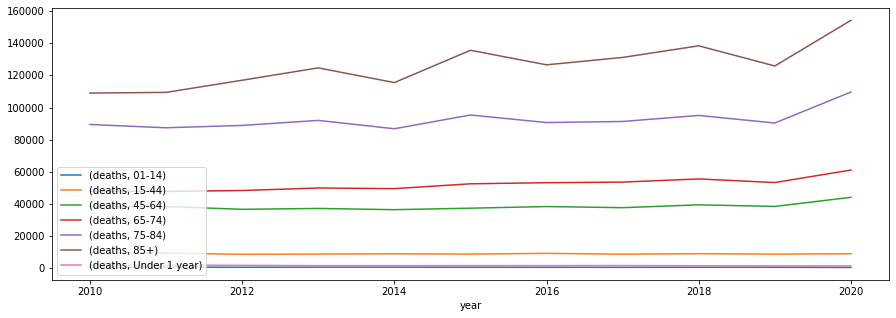

In [76]:
deaths_nhs_g1.plot(figsize=(15,5)).legend(loc='lower left')

In [82]:
x = deaths_nhs_g1.reset_index()

In [84]:
x

year deaths                                                 
age_group        01-14 15-44  45-64  65-74   75-84     85+ Under 1 year
0          2010    675  9644  38378  47827   89445  109005         1956
1          2011    671  9391  38384  47790   87404  109417         1913
2          2012    612  8680  36669  48365   88866  116986         1800
3          2013    652  8818  37201  49930   91988  124670         1631
4          2014    660  8986  36442  49534   86788  115515         1616
5          2015    612  8795  37362  52537   95347  135618         1649
6          2016    592  9252  38381  53223   90649  126573         1642
7          2017    560  8752  37679  53606   91324  131166         1692
8          2018    585  9053  39461  55568   95077  138400         1540
9          2019    593  8780  38461  53314   90362  125857         1488
10         2020    490  8999  44125  61113  109639  154243         1479

In [104]:
s1 = x[x.year != 2020].describe()[1:3]

In [123]:
s1.to_clipboard()

In [106]:
s1.columns

MultiIndex([(  'year',             ''),
            ('deaths',        '01-14'),
            ('deaths',        '15-44'),
            ('deaths',        '45-64'),
            ('deaths',        '65-74'),
            ('deaths',        '75-84'),
            ('deaths',          '85+'),
            ('deaths', 'Under 1 year')],
           names=[None, 'age_group'])

In [121]:
s2 = x[x.year == 2020].describe()[1:3]

In [122]:
s2

year deaths                                                \
age_group          01-14   15-44    45-64    65-74     75-84       85+   
mean       2020.0  490.0  8999.0  44125.0  61113.0  109639.0  154243.0   
std           NaN    NaN     NaN      NaN      NaN       NaN       NaN   

                        
age_group Under 1 year  
mean            1479.0  
std                NaN

In [124]:
s2.to_clipboard()

In [120]:
s2[s2.index == 'mean'] - s1[s1.index == 'mean']

year deaths                                                     
age_group       01-14 15-44   45-64   65-74    75-84      85+ Under 1 year
mean       5.5 -131.2 -16.1  6283.2  9943.6  18914.0  30922.3       -213.7

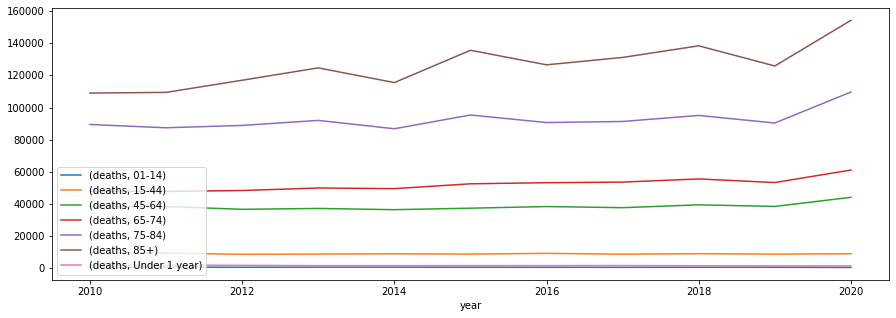

In [91]:
deaths_nhs_g1.plot(figsize=(15,5)).legend(loc='lower left')